In [1]:
from modules.validator import Validator
from modules.eda_class_native import run_eda, standardize_runs_df, df_runid_summary #, Validator
from modules.constants_settings import ConstantsSettings as CS
import pandas as pd
from modules.data_import import infer_source_files_technology, read_references_filter

In [2]:

METADATA_DIR = "benchmark_metadata/"
INTERMEDIATE_OUTPUT_DIR= "analysis_data/"
OUTPUT_DIR = "output/"
INPUT_DIR = "benchmark_data/"
technology= CS.TECHNOLOGY_minion # options minion, illumina_old


In [3]:

all_reports_file, all_parameters_file, all_references_file, validation_file= infer_source_files_technology(technology, INPUT_DIR, METADATA_DIR)
raw_refs= read_references_filter(all_references_file, benchmark_prefix="benchmark_batch")

## validation data
validator = Validator(validation_file, raw_refs)


### summary data
eda_runs = run_eda(validator, all_reports_file, all_parameters_file, 
                   INTERMEDIATE_OUTPUT_DIR)


### pre-processing
eda_runs.split()
eda_runs.combine_data()

full_data = eda_runs.combdat
dataset_success = eda_runs.get_combd_data_success()
dataset_fail= eda_runs.get_combd_data_failed()

/home/bioinf/Desktop/INSA/Manuscript/Manuscript_TELEVIR/BENCHMARK_EDA/modules/eda_class_native.py:607: DtypeWarning: Columns (46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  combdat = pd.read_csv(self.combined_reports_path, sep="\t")


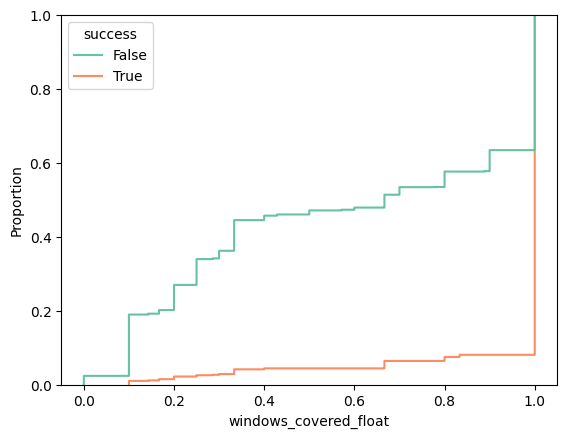

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt
# plot coverage by success status in dataset
import numpy as np

def convert_wcov(wcov):

    wcov= wcov.split("/")
    wcov= float(wcov[0])/float(wcov[1])
    return wcov

dataset= eda_runs.combdat
dataset["windows_covered"]= dataset.windows_covered.fillna("0/1")
dataset["windows_covered_float"]= dataset.windows_covered.apply(convert_wcov)


sns.ecdfplot(data=dataset, x="windows_covered_float", hue="success", palette="Set2")
plt.savefig("windows_covered_cdf_by_success_ont.png", dpi=300, bbox_inches='tight')
plt.show()


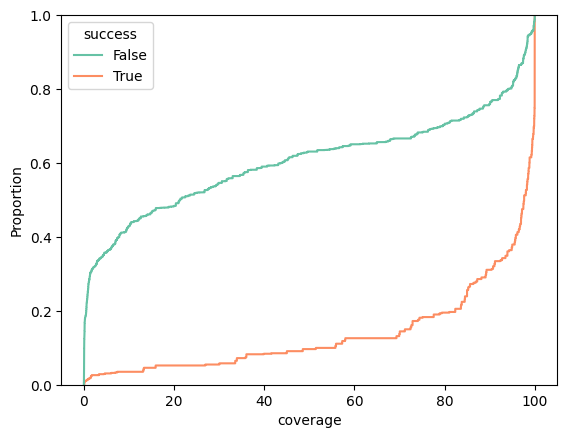

In [5]:
# plot plot coverage cdf by success status in dataset

#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set(font_scale=1.5)

#

sns.ecdfplot(data=dataset, x="coverage", hue="success", palette="Set2")
plt.savefig("coverage_cdf_by_success_ont.png", dpi=300, bbox_inches='tight')
plt.show()


